# Persiapan Data



### Membaca Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as SScore
from sklearn.metrics import davies_bouldin_score as DBScore
from sklearn import cluster
from sklearn.impute import SimpleImputer

df = pd.read_csv('/content/drive/My Drive/dataset/Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


###Penjelasan kolom fitur



  Negara : Nama negara

  Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran

  Ekspor : Ekspor barang dan jasa perkapita

  Kesehatan: Total pengeluaran kesehatan perkapita

  Impor: Impor barang dan jasa perkapita

  Pendapatan: Penghasilan bersih perorang

  Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 

  Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama

  Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
 
  GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Data ini memiliki 176 rows dan 10 kolom

## Cek Data Kosong

In [5]:
df.isna().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

## Cek Data Duplikat


In [6]:
print('Jumlah original rows: ', df.shape[0])
print('Jumlah data duplikat: ', df.duplicated().sum())

Jumlah original rows:  167
Jumlah data duplikat:  0


## Membersihkan Outliers

### Mencari Outliers

<Axes: xlabel='Kematian_anak'>

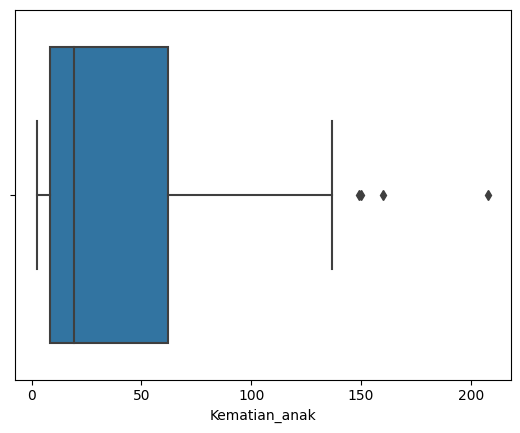

In [7]:
sns.boxplot(x='Kematian_anak', data=df)

Bisa dilihat nilai terpencil dari data diatas adalah 18 yang mana angkanya tidak terlalu jauh dan masih masuk akal sehingga tidak perlu di remove

<Axes: xlabel='GDPperkapita'>

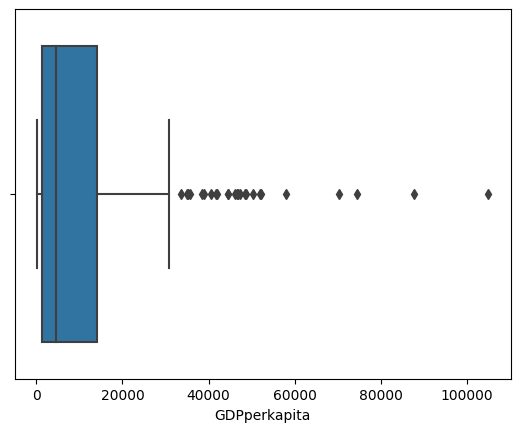

In [8]:
sns.boxplot(x='GDPperkapita', data=df)

<Axes: xlabel='Pendapatan'>

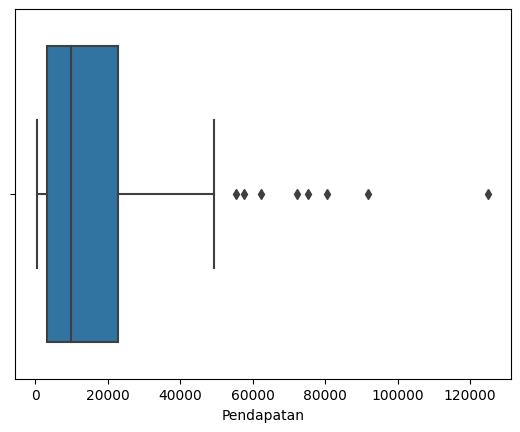

In [9]:
sns.boxplot(x='Pendapatan', data=df)

In [10]:
def remove_outlier_IQR(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3-Q1
  df_final = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
  return df_final

In [11]:
df_outlier_remove = remove_outlier_IQR(df[['Kematian_anak', 'GDPperkapita', 'Pendapatan']])
df_outlier_remove.dropna(axis=0, inplace=True)
df_outlier_remove

,Kematian_anak,GDPperkapita,Pendapatan
0,90.2,553.0,1610.0
1,16.6,4090.0,9930.0
2,27.3,4460.0,12900.0
3,119.0,3530.0,5900.0
4,10.3,12200.0,19100.0
...,...,...,...
162,29.2,2970.0,2950.0
163,17.1,13500.0,16500.0
164,23.3,1310.0,4490.0
165,56.3,1310.0,4480.0


<Axes: xlabel='Kematian_anak'>

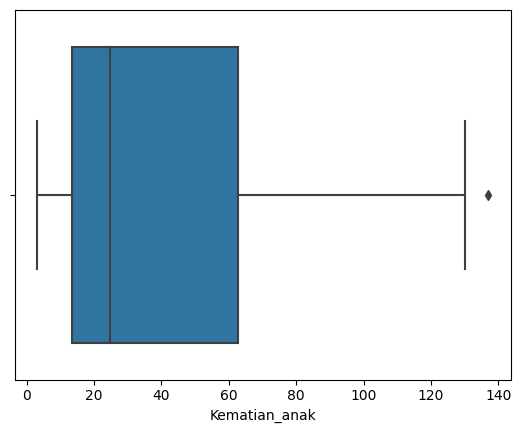

In [12]:
sns.boxplot(x='Kematian_anak', data=df_outlier_remove)

<Axes: xlabel='GDPperkapita'>

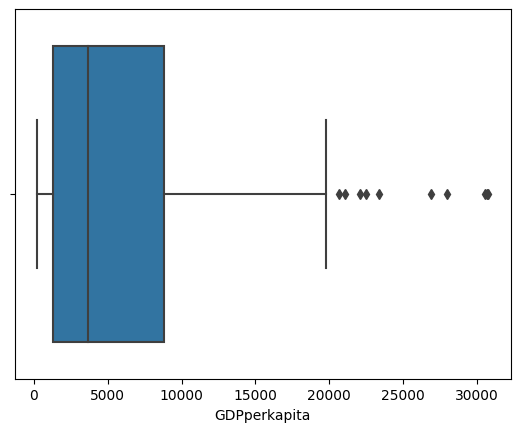

In [13]:
sns.boxplot(x='GDPperkapita', data=df_outlier_remove)

<Axes: xlabel='Pendapatan'>

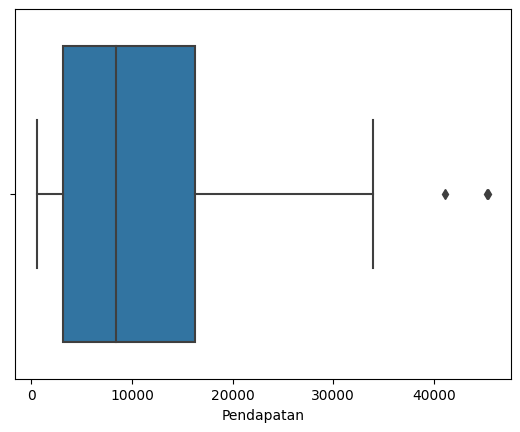

In [14]:
sns.boxplot(x='Pendapatan', data=df_outlier_remove)

## Analisis Eksplorasi Data

In [15]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [16]:
df_copy = df.copy()
df_copy = df_copy.sort_values(by='GDPperkapita', ascending=False).head(10)

In [17]:
df_copy

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400


### Analisis Univariate

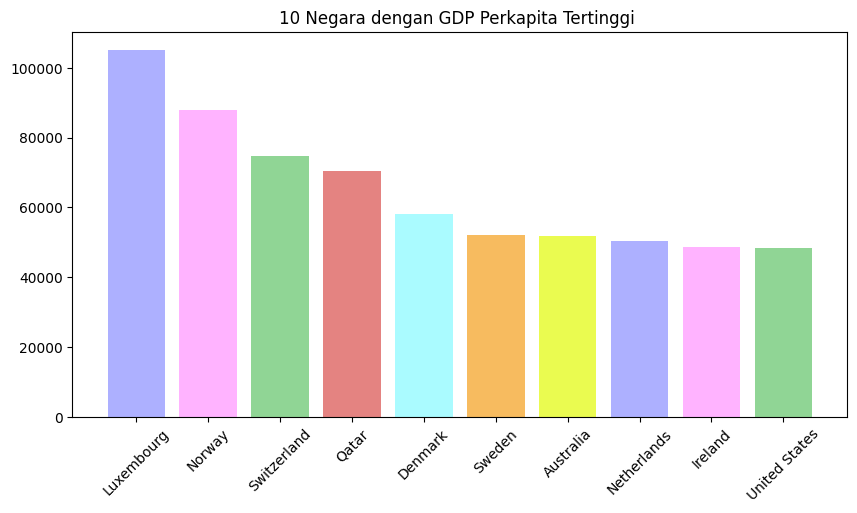

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(df_copy['Negara'], df_copy['GDPperkapita'],  color=["#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff", "#f7bb5f", "#eafb50"])
ax.set_title('10 Negara dengan GDP Perkapita Tertinggi ')
plt.xticks(rotation=45)
plt.show()

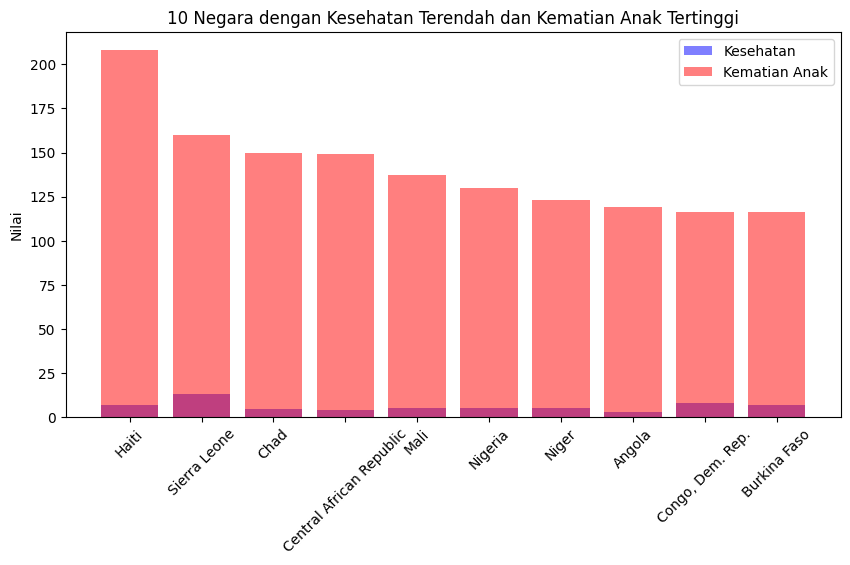

In [37]:
lowest_health_highest_child_mortality = df.nlargest(10, ['Kematian_anak', 'Kesehatan'])
countries = lowest_health_highest_child_mortality['Negara']
health = lowest_health_highest_child_mortality['Kesehatan']
child_mortality = lowest_health_highest_child_mortality['Kematian_anak']

plt.figure(figsize=(10, 5))
plt.bar(countries, health, color='blue', alpha=0.5, label='Kesehatan')
plt.bar(countries, child_mortality, color='red', alpha=0.5, label='Kematian Anak')
plt.xticks(rotation=45)
plt.ylabel('Nilai')
plt.title('10 Negara dengan Kesehatan Terendah dan Kematian Anak Tertinggi')
plt.legend()
plt.show()


### Analisis Bivariate


In [20]:
df_outlier_remove_clust = remove_outlier_IQR(df[['Kesehatan', 'Pendapatan']])
df_outlier_remove_clust.dropna(axis=0, inplace=True)

Text(0.5, 1.0, 'Korelasi antara Jumlah Pendapatan dan Kesehatan')

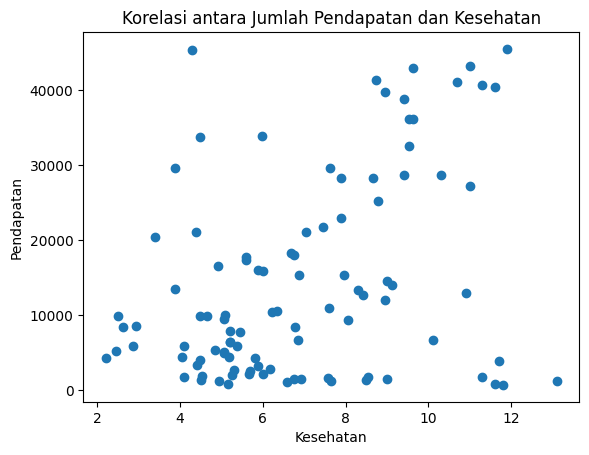

In [36]:
df_filtered = df_outlier_remove_clust[df_outlier_remove_clust['Kesehatan'] < 100].sample(100)
plt.scatter(x='Kesehatan', y='Pendapatan', data=df_filtered)
plt.xlabel('Kesehatan')
plt.ylabel('Pendapatan')
plt.title('Korelasi antara Jumlah Pendapatan dan Kesehatan')

kita dapat melihat adanya kecenderungan bahwa semakin tinggi jumlah pendapatan suatu negara, maka semakin tinggi pula tingkat kesehatannya. Meskipun ada beberapa titik yang menunjukkan bahwa meskipun pendapatannya tinggi, tingkat kesehatannya masih rendah, dan begitu juga sebaliknya. Namun, secara keseluruhan, plot tersebut menunjukkan adanya hubungan positif antara jumlah pendapatan dan kesehatan.

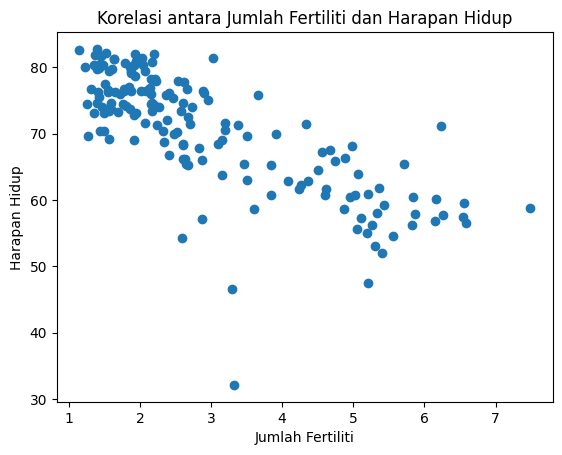

In [22]:
plt.scatter(df['Jumlah_fertiliti'], df['Harapan_hidup'])
plt.xlabel('Jumlah Fertiliti')
plt.ylabel('Harapan Hidup')
plt.title('Korelasi antara Jumlah Fertiliti dan Harapan Hidup')
plt.show()

Pada plot diatas, kita bisa melihat adanya korelasi negatif antara kedua variabel tersebut, yaitu semakin tinggi jumlah fertiliti maka semakin rendah harapan hidupnya.

###Analisis Multivariate

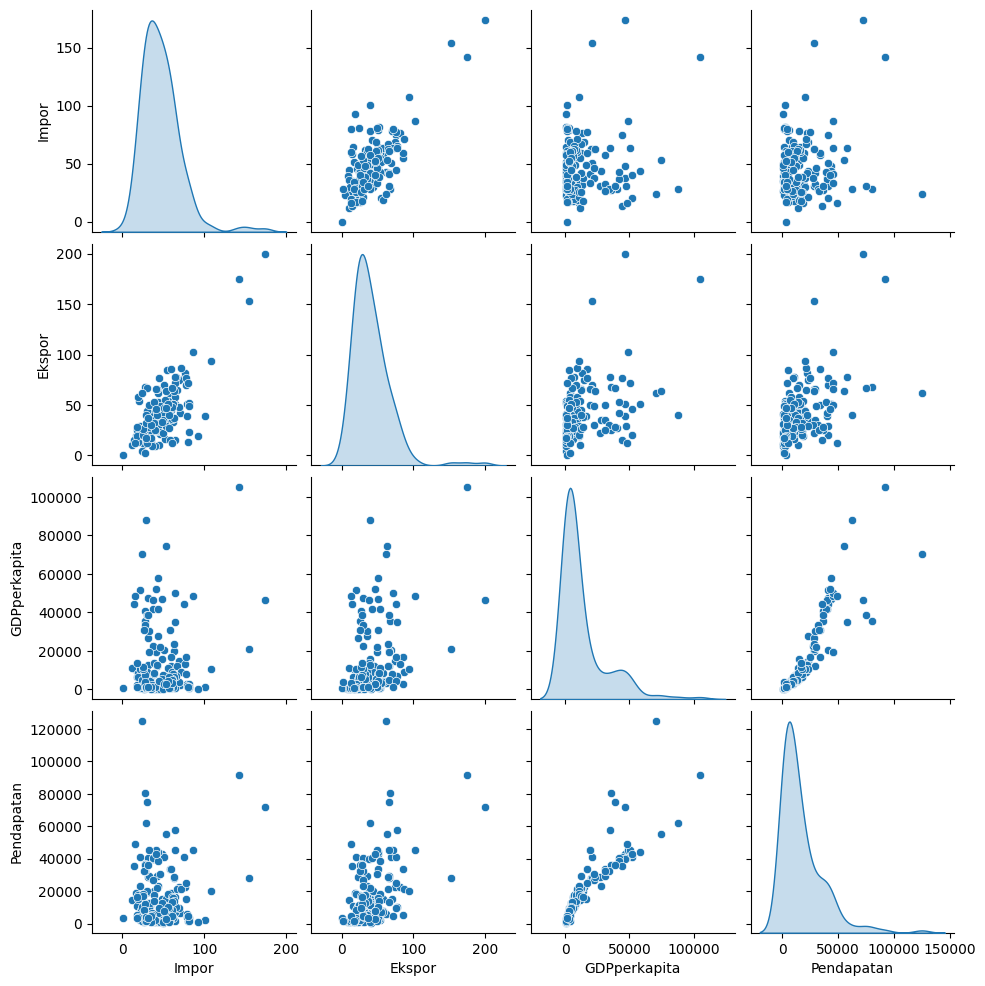

In [23]:
df_scatter_matrix = df[['Impor', 'Ekspor', 'GDPperkapita', 'Pendapatan']]
df_scatter_matrix

sns.pairplot(df_scatter_matrix, diag_kind='kde')
plt.show()

### KMean Cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


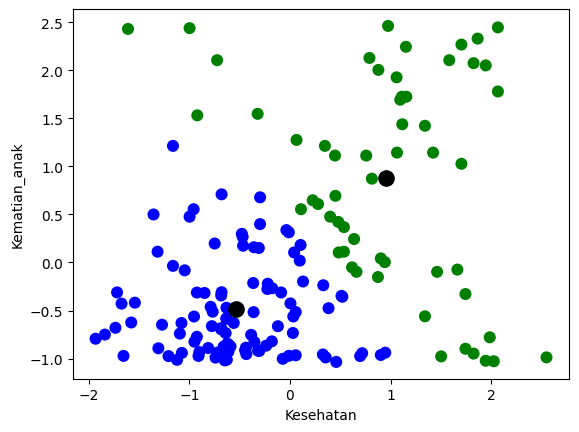

In [24]:
sc = StandardScaler()
dfoutlier_std = sc.fit_transform(df_outlier_remove_clust.astype(float))
kmeans1 = KMeans(n_clusters=2, random_state=42).fit(dfoutlier_std)
labels1 = kmeans1.labels_

new_dfoutlier_std = pd.DataFrame(data= dfoutlier_std, columns=[ 'Kesehatan', 'Kematian_anak'])
new_dfoutlier_std['label_kmeans1'] = labels1

plt.scatter(new_dfoutlier_std.Kesehatan[new_dfoutlier_std.label_kmeans1 == 0], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans1 == 0], c='blue', s=75, edgecolor='none', linestyle='-')
plt.scatter(new_dfoutlier_std.Kesehatan[new_dfoutlier_std.label_kmeans1 == 1], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans1 == 1], c='green', s=75, edgecolor='none', linestyle='-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=120)
plt.xlabel('Kesehatan')
plt.ylabel('Kematian_anak')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

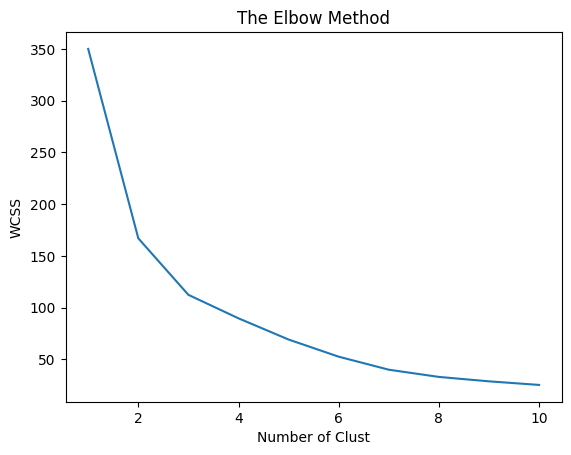

In [25]:
wcss= []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
  kmeans.fit(new_dfoutlier_std)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clust')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


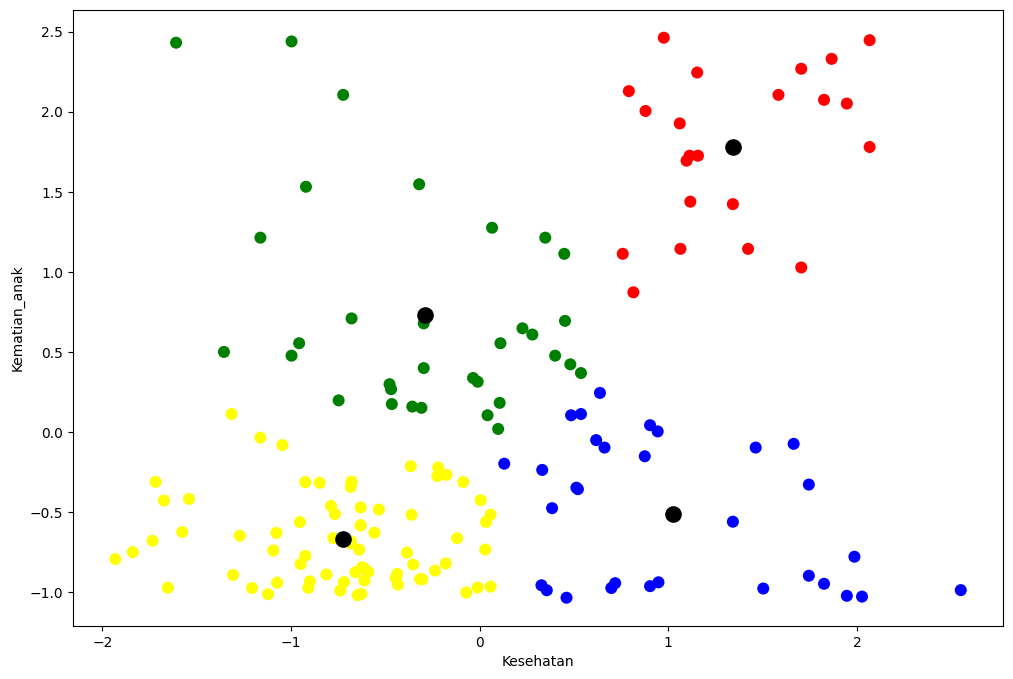

In [26]:
kmeans2 = KMeans(n_clusters=4, random_state=42).fit(dfoutlier_std)
labels2 = kmeans2.labels_

new_dfoutlier_std = pd.DataFrame(data= dfoutlier_std, columns=['Kesehatan', 'Kematian_anak'])
new_dfoutlier_std['label_kmeans2'] = labels2

plt.figure(figsize=(12,8))

plt.scatter(new_dfoutlier_std.Kesehatan[new_dfoutlier_std.label_kmeans2 == 0], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans2 == 0], c='blue', s=75, edgecolor='none', linestyle='-')
plt.scatter(new_dfoutlier_std.Kesehatan[new_dfoutlier_std.label_kmeans2 == 1], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans2 == 1], c='green', s=75, edgecolor='none', linestyle='-')
plt.scatter(new_dfoutlier_std.Kesehatan[new_dfoutlier_std.label_kmeans2 == 2], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans2 == 2], c='red', s=75, edgecolor='none', linestyle='-')
plt.scatter(new_dfoutlier_std.Kesehatan[new_dfoutlier_std.label_kmeans2 == 3], new_dfoutlier_std['Kematian_anak'][new_dfoutlier_std.label_kmeans2 == 3], c='yellow', s=75, edgecolor='none', linestyle='-')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=120)
plt.xlabel('Kesehatan')
plt.ylabel('Kematian_anak')
plt.show()

In [27]:
print(SScore(new_dfoutlier_std, labels=labels1))
print(SScore(new_dfoutlier_std, labels=labels2))

0.3854890613916246
0.6292760784070511


In [28]:
countries_cluster0 = df.iloc[new_dfoutlier_std[new_dfoutlier_std.label_kmeans2 == 1].index]['Negara']
print(countries_cluster0)


4      Antigua and Barbuda
5                Argentina
9               Azerbaijan
10                 Bahamas
11                 Bahrain
14                 Belarus
23                  Brunei
32                    Chad
40           Cote d'Ivoire
41                 Croatia
42                  Cyprus
48             El Salvador
50                 Eritrea
66                   Haiti
70               Indonesia
73                 Ireland
78                  Jordan
83         Kyrgyz Republic
84                     Lao
87                 Lesotho
88                 Liberia
92          Macedonia, FYR
97                    Mali
110            Netherlands
116               Pakistan
118               Paraguay
119                   Peru
122               Portugal
125                 Russia
131             Seychelles
136        Solomon Islands
145            Switzerland
153                 Turkey
Name: Negara, dtype: object


KMeans 3 Dimensi

In [29]:
dataKMeans = df[['Kematian_anak', 'Pendapatan', 'GDPperkapita']]
dataKMeans

,Kematian_anak,Pendapatan,GDPperkapita
0,90.2,1610,553
1,16.6,9930,4090
2,27.3,12900,4460
3,119.0,5900,3530
4,10.3,19100,12200
...,...,...,...
162,29.2,2950,2970
163,17.1,16500,13500
164,23.3,4490,1310
165,56.3,4480,1310


In [30]:
sc = StandardScaler()

# Mengubah data menjadi skala standar
data_scaled = sc.fit_transform(dataKMeans[['Kematian_anak', 'Pendapatan', 'GDPperkapita']])

# Menyimpan hasil scaling ke dalam dataframe baru
data_scaled_df = pd.DataFrame(data_scaled, columns=['Kematian_anak', 'Pendapatan', 'GDPperkapita'])

# Menggabungkan data scaled dengan kolom Negara
data_scaled_df['Negara'] = df['Negara'].values

# Menghapus baris yang mengandung missing value
data_scaled_df.dropna(axis=0, inplace=True)

# Menghapus outlier
data_scaled_df = remove_outlier_IQR(data_scaled_df)
data_scaled_df

<ipython-input-10-b4e286b0f9a9>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-10-b4e286b0f9a9>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-10-b4e286b0f9a9>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]


,Kematian_anak,Pendapatan,GDPperkapita,Negara
0,1.291532,-0.808245,-0.679180,Afghanistan
1,-0.538949,-0.375369,-0.485623,Albania
2,-0.272833,-0.220844,-0.465376,Algeria
3,2.007808,-0.585043,-0.516268,Angola
4,-0.695634,0.101732,-0.041817,Antigua and Barbuda
...,...,...,...,...
162,-0.225578,-0.738527,-0.546913,Vanuatu
163,-0.526514,-0.033542,0.029323,Venezuela
164,-0.372315,-0.658404,-0.637754,Vietnam
165,0.448417,-0.658924,-0.637754,Yemen


In [31]:
imputer = SimpleImputer(strategy='mean')

# Imputasi nilai-nilai yang hilang pada data scaled
data_scaled_imputed = imputer.fit_transform(data_scaled_df[['Kematian_anak', 'Pendapatan', 'GDPperkapita']])

# Simpan hasil imputasi ke dalam dataframe baru
data_scaled_imputed_df = pd.DataFrame(data_scaled_imputed, columns=['Kematian_anak', 'Pendapatan', 'GDPperkapita'])

# Gabungkan data imputed dengan kolom Negara
data_scaled_imputed_df['Negara'] = data_scaled_df['Negara'].values

# Menambahkan kolom baseline
LabelBaseline = KMeans(n_clusters=3).fit(data_scaled_imputed_df[['Kematian_anak', 'Pendapatan', 'GDPperkapita']])
data_scaled_imputed_df['Baseline'] = LabelBaseline.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
print('Silhouette Score : '+str(SScore(data_scaled_imputed_df[['Kematian_anak','Pendapatan','GDPperkapita']],data_scaled_imputed_df['Baseline'])))
print('Davis Bouldin Score : '+str(DBScore(data_scaled_imputed_df[['Kematian_anak','Pendapatan','GDPperkapita']],data_scaled_imputed_df['Baseline'])))

Silhouette Score : 0.5048584689632958
Davis Bouldin Score : 0.6938984112498274


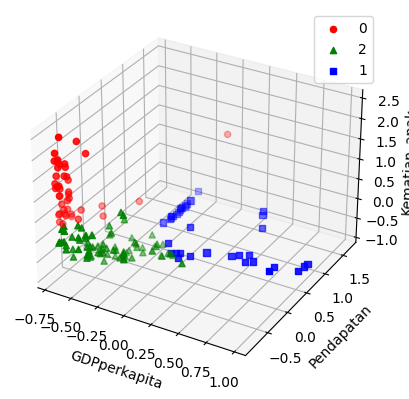

In [33]:

fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
markers = ['o', '^','s']
colors = ['r', 'g','b']
for i,seg in enumerate(data_scaled_imputed_df['Baseline'].unique()):
    x = data_scaled_imputed_df.loc[data_scaled_imputed_df['Baseline']==seg,'GDPperkapita']
    y = data_scaled_imputed_df.loc[data_scaled_imputed_df['Baseline']==seg,'Pendapatan']
    z = data_scaled_imputed_df.loc[data_scaled_imputed_df['Baseline']==seg,'Kematian_anak']
    ax.scatter(x,y,z,c=colors[i],marker=markers[i],label=seg)
ax.set_xlabel('GDPperkapita')
ax.set_ylabel('Pendapatan')
ax.set_zlabel('Kematian_anak', labelpad=1)
ax.legend()
plt.show()

In [34]:
data_scaled_imputed_df[data_scaled_imputed_df['Baseline']==0]['Negara']

0            Afghanistan
3                 Angola
17                 Benin
25          Burkina Faso
26               Burundi
28              Cameroon
36               Comoros
37      Congo, Dem. Rep.
38           Congo, Rep.
40         Cote d'Ivoire
49     Equatorial Guinea
50               Eritrea
55                 Gabon
56                Gambia
59                 Ghana
63                Guinea
64         Guinea-Bissau
69                 India
80                 Kenya
81              Kiribati
84                   Lao
87               Lesotho
88               Liberia
93            Madagascar
94                Malawi
97                  Mali
99            Mauritania
106           Mozambique
107              Myanmar
108              Namibia
112                Niger
113              Nigeria
116             Pakistan
126               Rwanda
129              Senegal
142                Sudan
146           Tajikistan
147             Tanzania
149          Timor-Leste
150                 Togo


In [39]:
data_scaled_imputed_df[data_scaled_imputed_df['Baseline']==1]['Negara']

7            Australia
8              Austria
10             Bahamas
11             Bahrain
15             Belgium
29              Canada
41             Croatia
42              Cyprus
43      Czech Republic
44             Denmark
51             Estonia
53             Finland
54              France
58             Germany
60              Greece
67             Hungary
68             Iceland
73             Ireland
74              Israel
75               Italy
77               Japan
89               Libya
90           Lithuania
98               Malta
110        Netherlands
111        New Zealand
115               Oman
121             Poland
122           Portugal
125             Russia
128       Saudi Arabia
134    Slovak Republic
135           Slovenia
138        South Korea
139              Spain
144             Sweden
158     United Kingdom
159      United States
Name: Negara, dtype: object

In [42]:
data_scaled_imputed_df[data_scaled_imputed_df['Baseline']==2]['Negara']

1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: Negara, Length: 85, dtype: object